In [22]:
## Import dependencies
import pandas as pd
from linearmodels import PanelOLS
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("project_data_rates.csv", index_col=0).rename(
    columns={
        "permanent_housing": "permanent_housing_rate",
        "homeless": "homeless_rate",
        "poverty": "poverty_rate",
        "Black or African American": "african_american",
        "American Indian and Alaska Native": "american_indian_n_alaska_native",
        "Asian": "asian",
        "Native Hawaiian and Other Pacific Islander": "pacific_islander",
        "Two or More Races": "multiple_races",
        "Non Hispanic": "non_hispanic",
        "Drug Deaths": "drug_death_rate",
        "Suicide Deaths": "suicide_death_rate",
    }
)
data.head()


,CoC Number,Coc,Year,permanent_housing_rate,homeless_rate,poverty_rate,unemployment_rate,Population,Male,Female,White,african_american,american_indian_n_alaska_native,asian,pacific_islander,multiple_races,non_hispanic,Hispanic,drug_death_rate,suicide_death_rate
0,AZ-502,"Phoenix,Mesa/Maricopa",2007,52.001543,218.127624,98946.775104,3200.0,3872962,50412.475000,49587.525000,87858.904890,4886.079440,2248.950545,3007.620524,231.967161,1766.477440,69301.067245,30698.932755,14.846518,14.665778
1,AZ-502,"Phoenix,Mesa/Maricopa",2008,63.740080,181.620069,98615.857511,5100.0,3958263,50450.159578,49549.840422,87561.084243,5048.527599,2244.696727,3094.817095,236.568414,1814.305922,68666.685362,31333.314638,13.288657,13.642348
2,AZ-502,"Phoenix,Mesa/Maricopa",2009,62.861472,196.091006,98737.277325,8900.0,4023132,50471.871169,49528.128831,87320.152558,5202.364725,2218.719147,3163.182317,240.484279,1855.096974,68167.934833,31832.065167,14.068641,13.024678
3,AZ-502,"Phoenix,Mesa/Maricopa",2010,78.933918,183.358278,98824.767488,9500.0,3817117,49473.594862,50526.405138,85623.940791,5389.722138,2610.949573,3675.155883,264.990567,2435.241047,70429.489062,29570.510938,15.954449,14.775549
4,AZ-502,"Phoenix,Mesa/Maricopa",2011,82.933995,150.463014,98699.221313,8500.0,3875371,49431.628611,50568.371389,85242.470979,5479.423776,2627.387159,3847.347777,266.142261,2537.228049,70307.797628,29692.202372,16.179096,16.024272


0      52.001543
1      63.740080
2      62.861472
3      78.933918
4      82.933995
5     113.445107
6     117.377522
7     133.778055
8     127.418807
9     136.354488
10    150.096080
11    166.935055
12    147.832016
13    135.289155
14    137.993519
Name: permanent_housing_rate, dtype: float64

In [19]:
data['CoC Number'].unique()

array(['AZ-502', 'CA-500', 'CA-501', 'CA-600', 'CA-601', 'CA-609',
       'CO-503', 'DC-500', 'FL-501', 'GA-500', 'IL-510', 'MA-500',
       'MI-501', 'NV-500', 'NY-600', 'PA-500', 'TX-503', 'TX-700',
       'WA-500'], dtype=object)

In [20]:
data['Coc'].unique()

array(['Phoenix,Mesa/Maricopa', 'San Jose/Santa Clara City & County',
       'San Francisco', 'Los Angeles City & County',
       'San Diego City and County', 'San Bernardino City & County',
       'Metropolitan Denver', 'District of Columbia',
       'Tampa/Hillsborough County', 'Atlanta', 'Chicago', 'Boston',
       'Detroit', 'Las Vegas/Clark County', 'New York City',
       'Philadelphia', 'Austin/Travis County',
       'Houston, Pasadena, Conroe/Harris, Ft. Bend, Montgomery',
       'Seattle/King'], dtype=object)

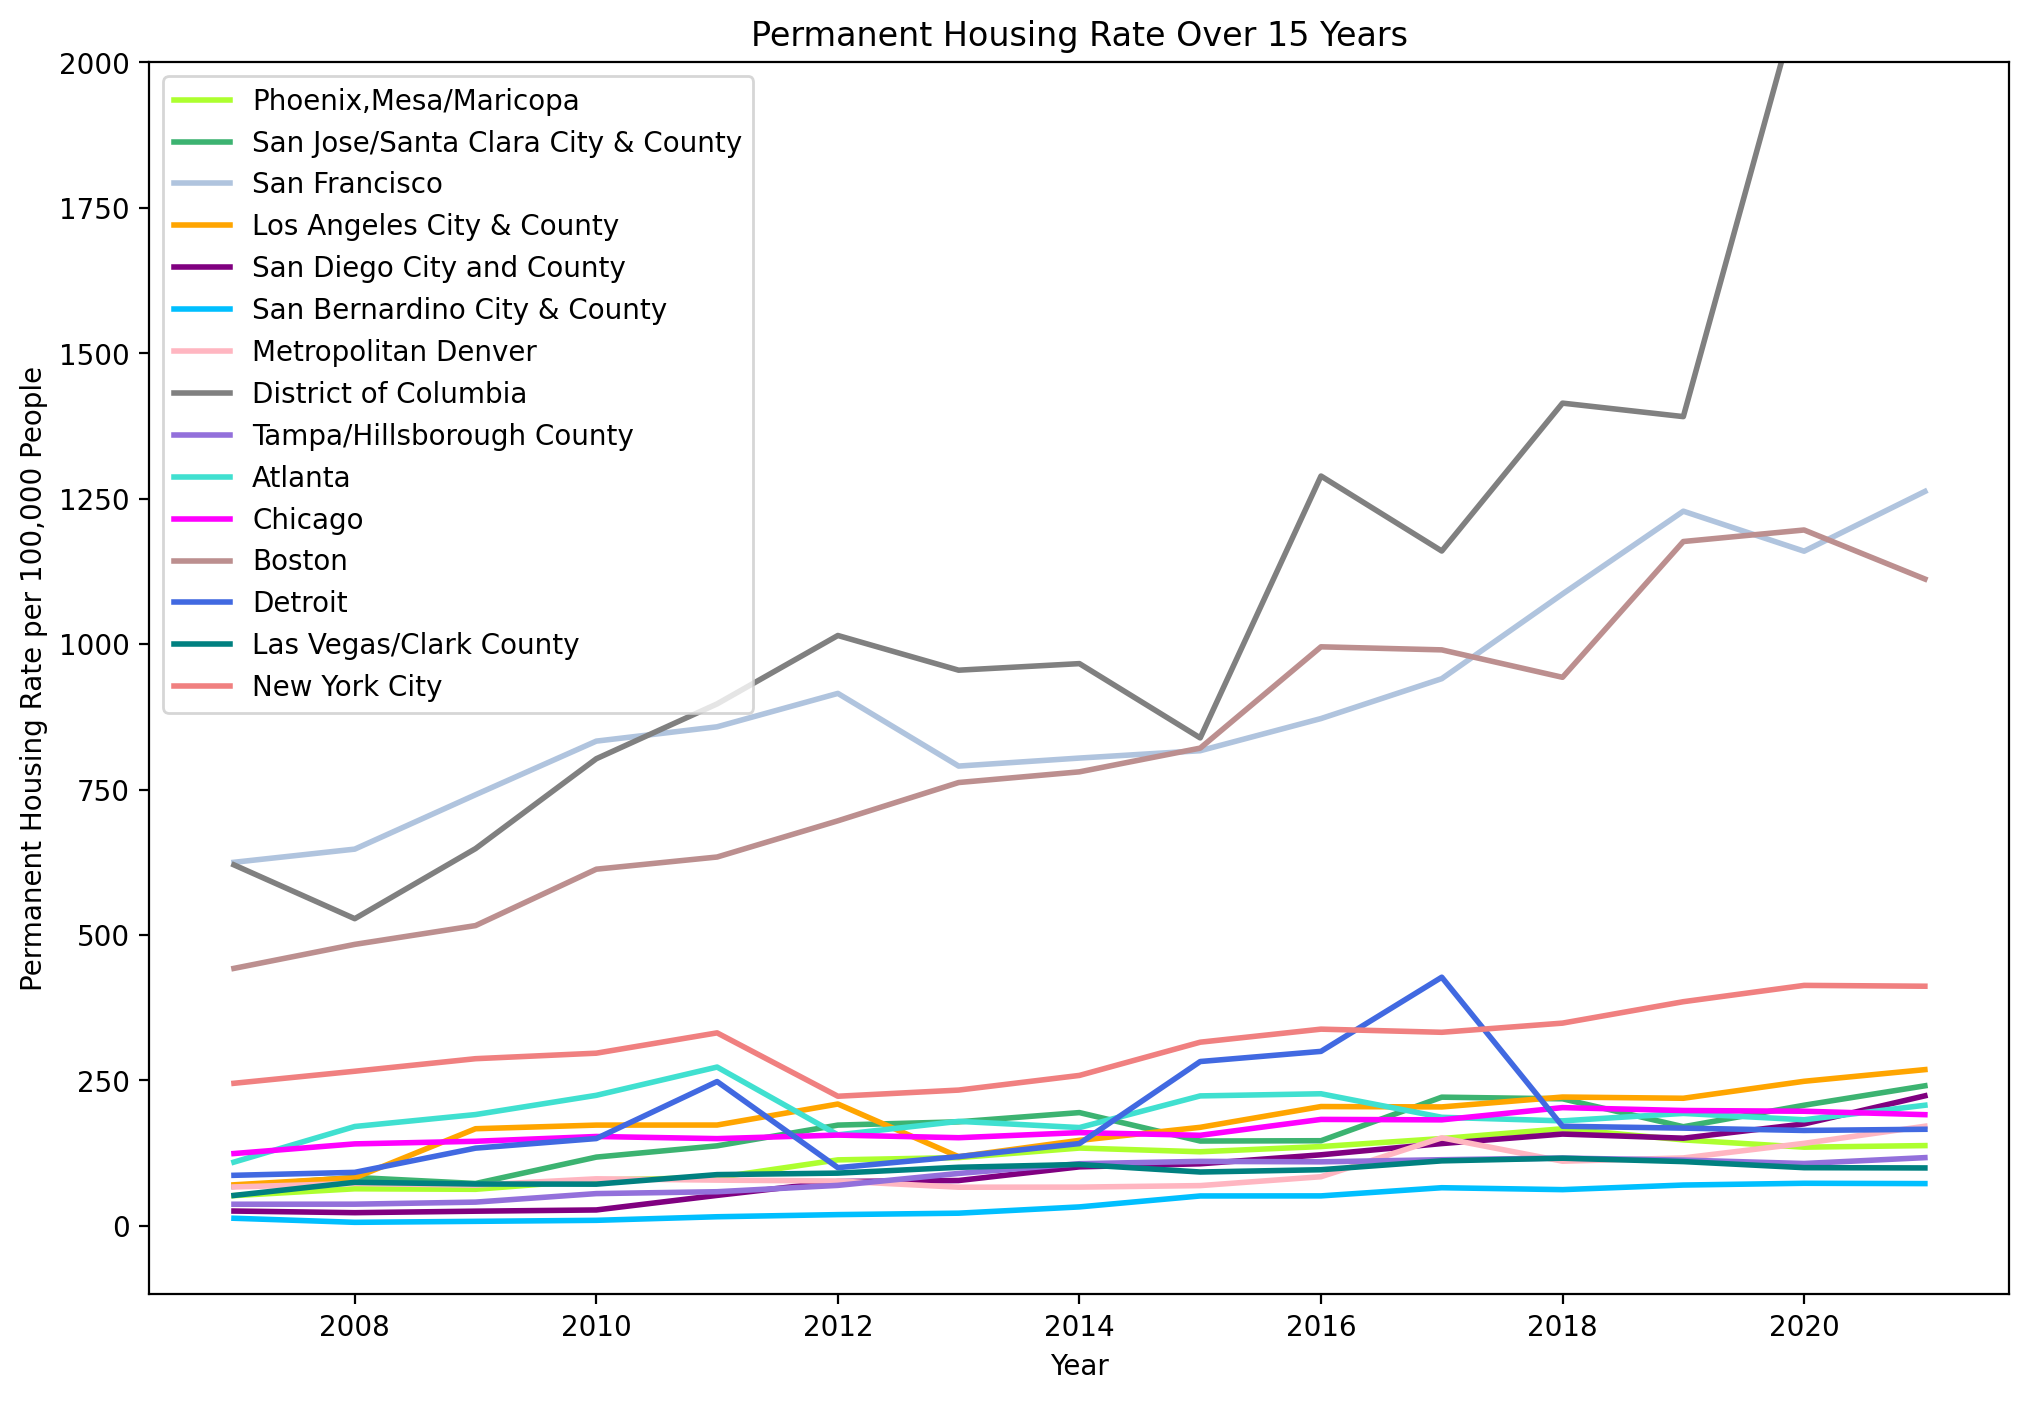

In [56]:
colors = [
    "greenyellow",
    "mediumseagreen",
    "lightsteelblue",
    "orange",
    "purple",
    "deepskyblue",
    "lightpink",
    "gray",
    "mediumpurple",
    "turquoise",
    "magenta",
    "rosybrown",
    "royalblue",
    "teal",
    "lightcoral",
]

plt.figure(figsize=(12, 8))
for i in range(15):
    plt.plot(
        data["Year"].unique(),
        data[data["CoC Number"] == data["CoC Number"].unique()[i]][
            "permanent_housing_rate"
        ],
        label=data["Coc"].unique()[i],
        linewidth=2,
        color=colors[i],
    )
plt.legend()
plt.ylabel("Permanent Housing Rate per 100,000 People")
plt.xlabel("Year")
plt.title("Permanent Housing Rate Over 15 Years")
plt.ylim(top=2000)
plt.show()


In [3]:
mod = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + Population + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate"
    "+ White + african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races + Female + Hispanic"
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type="clustered")
mod.summary


Dep. Variable:,homeless_rate,R-squared:,0.2584
Estimator:,PanelOLS,R-squared (Between):,-5.8004
No. Observations:,285,R-squared (Within):,-1.0079
Date:,"Tue, Apr 25 2023",R-squared (Overall):,-4.9346
Time:,20:14:02,Log-likelihood,-1689.7
Cov. Estimator:,Clustered,,
,,F-statistic:,6.4059
Entities:,19,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(13,239)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,11.656


In [5]:
mod11 = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate"
    "+ White + african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races + Female + Hispanic"
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit(cov_type="clustered")
mod11.summary

Dep. Variable:,homeless_rate,R-squared:,0.2485
Estimator:,PanelOLS,R-squared (Between):,-3.8513
No. Observations:,285,R-squared (Within):,-0.6242
Date:,"Tue, Apr 25 2023",R-squared (Overall):,-3.2682
Time:,20:20:06,Log-likelihood,-1691.6
Cov. Estimator:,Clustered,,
,,F-statistic:,6.6132
Entities:,19,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(12,240)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,12.595


In [26]:
(data.loc[:, "Year"] - data.loc[:, "Year"].shift()).value_counts()


 1.0     266
-14.0     18
Name: Year, dtype: int64

In [27]:
data.loc[:, "perm_housing_pct_chg"] = (
    data.loc[:, "permanent_housing_rate"]
    / data.loc[:, "permanent_housing_rate"].shift()
    - 1
)


In [28]:
data_w_pct_chg = data.set_index(["CoC Number", "Year"]).drop(index=2007, level=1)


In [29]:
mod2 = PanelOLS.from_formula(
    "homeless_rate ~ Population + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate + Female + Hispanic"
    "+ White + perm_housing_pct_chg + african_american + american_indian_n_alaska_native + asian + pacific_islander + multiple_races"
    "+ EntityEffects + TimeEffects",
    data=data_w_pct_chg,
    drop_absorbed=True,
).fit(cov_type="clustered")
mod2.summary


Dep. Variable:,homeless_rate,R-squared:,0.2456
Estimator:,PanelOLS,R-squared (Between):,-3.2338
No. Observations:,266,R-squared (Within):,-0.8066
Date:,"Sat, Apr 22 2023",R-squared (Overall):,-2.8707
Time:,21:50:58,Log-likelihood,-1557.3
Cov. Estimator:,Clustered,,
,,F-statistic:,5.5354
Entities:,19,P-value,0.0000
Avg Obs:,14.000,Distribution:,"F(13,221)"
Min Obs:,14.000,,
Max Obs:,14.000,F-statistic (robust):,359.78


In [30]:
mod.resids


CoC Number  Year
AZ-502      2007    -50.536507
            2008    -70.691888
            2009     14.809143
            2010     56.369679
            2011     34.143417
                       ...    
WA-500      2017     50.268256
            2018     55.393230
            2019    -16.399662
            2020    -20.845343
            2021   -190.987997
Name: residual, Length: 285, dtype: float64

In [31]:
data.corr(numeric_only=True)


,Year,permanent_housing_rate,homeless_rate,poverty_rate,unemployment_rate,Population,Male,Female,White,african_american,american_indian_n_alaska_native,asian,pacific_islander,multiple_races,non_hispanic,Hispanic,drug_death_rate,suicide_death_rate,perm_housing_pct_chg
Year,1.000000,0.215273,-0.157463,0.044940,-0.102237,0.036546,-0.023645,0.023645,-0.111439,-0.008523,0.160537,0.111121,0.064591,0.458532,-0.069063,0.069063,0.508867,0.110317,-0.044679
permanent_housing_rate,0.215273,1.000000,0.683066,-0.579332,-0.128192,-0.279464,-0.297272,0.297272,-0.539197,0.341193,-0.299962,0.218752,-0.081861,0.167562,0.399893,-0.399893,0.493541,-0.438602,0.119527
homeless_rate,-0.157463,0.683066,1.000000,-0.481101,0.050777,-0.140101,-0.320818,0.320818,-0.575664,0.363966,-0.339134,0.245654,-0.000419,0.064413,0.405925,-0.405925,0.092520,-0.499405,0.052974
poverty_rate,0.044940,-0.579332,-0.481101,1.000000,0.189647,0.410623,0.493421,-0.493421,0.396055,-0.490325,0.335988,0.189568,0.260622,0.128079,-0.344979,0.344979,-0.230387,0.398057,-0.137340
unemployment_rate,-0.102237,-0.128192,0.050777,0.189647,1.000000,0.392164,-0.164480,0.164480,0.081546,0.014145,0.114877,-0.123655,-0.184135,-0.167013,-0.065584,0.065584,-0.111447,0.039398,0.015836
Population,0.036546,-0.279464,-0.140101,0.410623,0.392164,1.000000,-0.089395,0.089395,0.187978,-0.175787,0.342926,0.013182,-0.027188,-0.149604,-0.534686,0.534686,-0.272898,-0.190039,-0.028764
Male,-0.023645,-0.297272,-0.320818,0.493421,-0.164480,-0.089395,1.000000,-1.000000,0.599165,-0.867411,0.344374,0.468610,0.559666,0.451702,-0.375348,0.375348,-0.285403,0.458763,-0.056800
Female,0.023645,0.297272,0.320818,-0.493421,0.164480,0.089395,-1.000000,1.000000,-0.599165,0.867411,-0.344374,-0.468610,-0.559666,-0.451702,0.375348,-0.375348,0.285403,-0.458763,0.056800
White,-0.111439,-0.539197,-0.575664,0.396055,0.081546,0.187978,0.599165,-0.599165,1.000000,-0.756061,0.579535,-0.252190,0.227629,0.084932,-0.607014,0.607014,-0.329660,0.578403,-0.069778
african_american,-0.008523,0.341193,0.363966,-0.490325,0.014145,-0.175787,-0.867411,0.867411,-0.756061,1.000000,-0.581660,-0.438244,-0.590180,-0.507110,0.560476,-0.560476,0.323356,-0.414047,0.044805


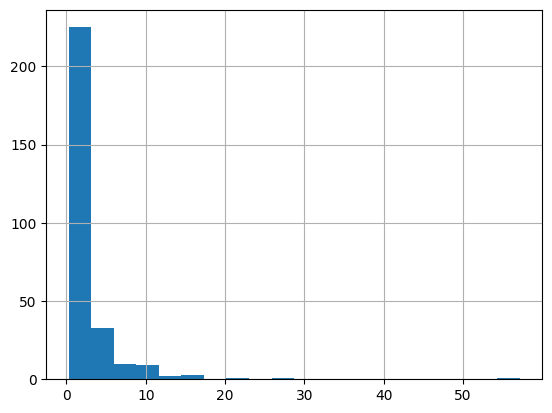

In [32]:
(data.loc[:, "homeless_rate"] / data.loc[:, "permanent_housing_rate"]).hist(bins=20)
plt.show()


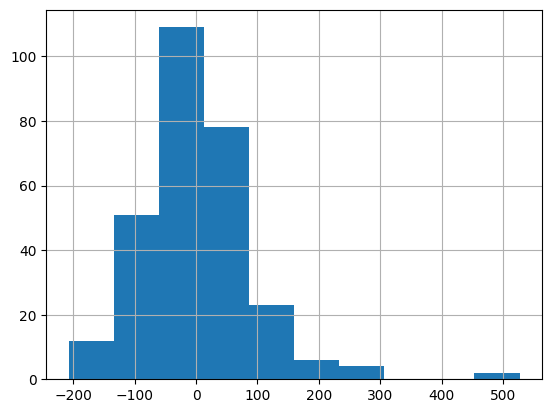

In [33]:
mod.resids.hist()
plt.show()


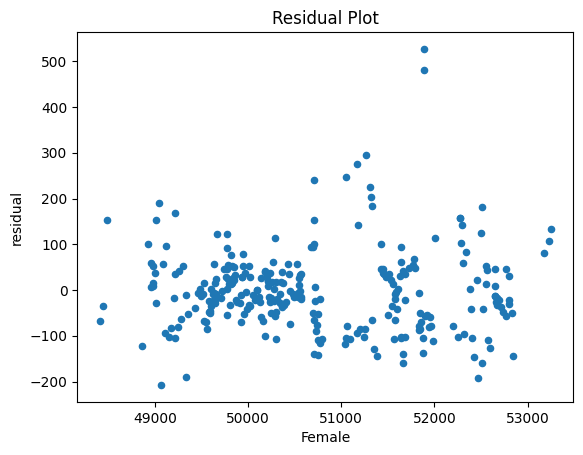

In [34]:
pd.concat(
    (data.set_index(["CoC Number", "Year"]).loc[:, "Female"], mod.resids), axis=1
).rename(columns={0: "residuals"}).plot.scatter(
    "Female", "residual", title="Residual Plot"
)
plt.show()


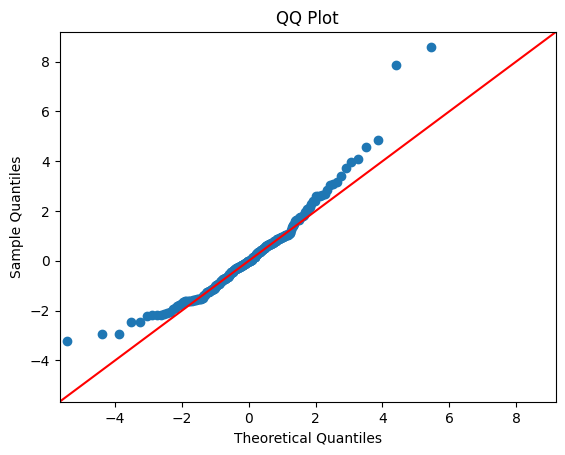

In [35]:
sm.qqplot(mod.resids, stats.t, fit=True, line="45")
plt.title("QQ Plot")
plt.show()


In [38]:
mod2 = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate"
    "+ Hispanic + non_hispanic"
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit()
mod2.summary


Dep. Variable:,homeless_rate,R-squared:,0.0415
Estimator:,PanelOLS,R-squared (Between):,0.2620
No. Observations:,285,R-squared (Within):,0.1183
Date:,"Sat, Apr 22 2023",R-squared (Overall):,0.2360
Time:,21:51:22,Log-likelihood,-1726.3
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.7743
Entities:,19,P-value,0.1049
Avg Obs:,15.000,Distribution:,"F(6,246)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,9.2920


In [39]:
mod3 = PanelOLS.from_formula(
    "homeless_rate ~ permanent_housing_rate + poverty_rate + unemployment_rate + drug_death_rate + suicide_death_rate"
    "+ Female"
    "+ EntityEffects + TimeEffects",
    data=data.set_index(["CoC Number", "Year"]),
    drop_absorbed=True,
).fit()
mod3.summary


Dep. Variable:,homeless_rate,R-squared:,0.0903
Estimator:,PanelOLS,R-squared (Between):,-185.49
No. Observations:,285,R-squared (Within):,0.1156
Date:,"Sat, Apr 22 2023",R-squared (Overall):,-174.50
Time:,21:51:27,Log-likelihood,-1718.8
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.0682
Entities:,19,P-value,0.0007
Avg Obs:,15.000,Distribution:,"F(6,246)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,4.0682
